# Traffic Sign Recognition with GTSRB dataset (German Traffic Sign Recognition Benchmark)


## Step 1: Import necessary libraries and load the data

* os library: provides functions for interacting with the operating system
* pathlib: to interact with the filesystem
* numpy: adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
* matplotlib: plotting library -> I used it to show datas-images
* csv: to read and write files
* sklearn: machine learning library -> I used it to  split data
* tensorflow: machine learning library, also contains keras library -> I used tensorflow.keras which contains functions that will be used in CNN(Convolutional Neural Network) algorithm implementation


In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [2]:
# defining necesssary file paths, image height and width
train_path = './Train'
test_path = './Test'
IMG_HEIGHT = 30
IMG_WIDTH = 30

print(os.listdir(train_path))

NUM_CATEGORIES = len(os.listdir(train_path)) # That will be the labels of our model.

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


#### Load and split data from given directory which will be the train_path. 

In [3]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [4]:
images, labels = load_data(train_path)
# converts label vector to binary matrix array (list to matrix)
labels = to_categorical(labels)

# Splitting the dataset into training and test set (total number of test images will be the %0 of total images)
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.2)

## Step 2: Get some idea from datasets


In [5]:
id_to_sign_names = dict()

with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    id_to_sign_names = {int(row[0]):row[1] for row in reader}
    csvfile.close()

In [6]:
# seeing the shape of our numpy arrays
print("Shape of training examples =", x_train.shape)
print("Shape of testing examples =", x_test.shape)
print("Image data shape =", x_test.shape[1:])
print("Number of classes =", len(id_to_sign_names))


Shape of training examples = (31367, 30, 30, 3)
Shape of testing examples = (7842, 30, 30, 3)
Image data shape = (30, 30, 3)
Number of classes = 43


In [7]:
# seeing the classes
id_to_sign_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

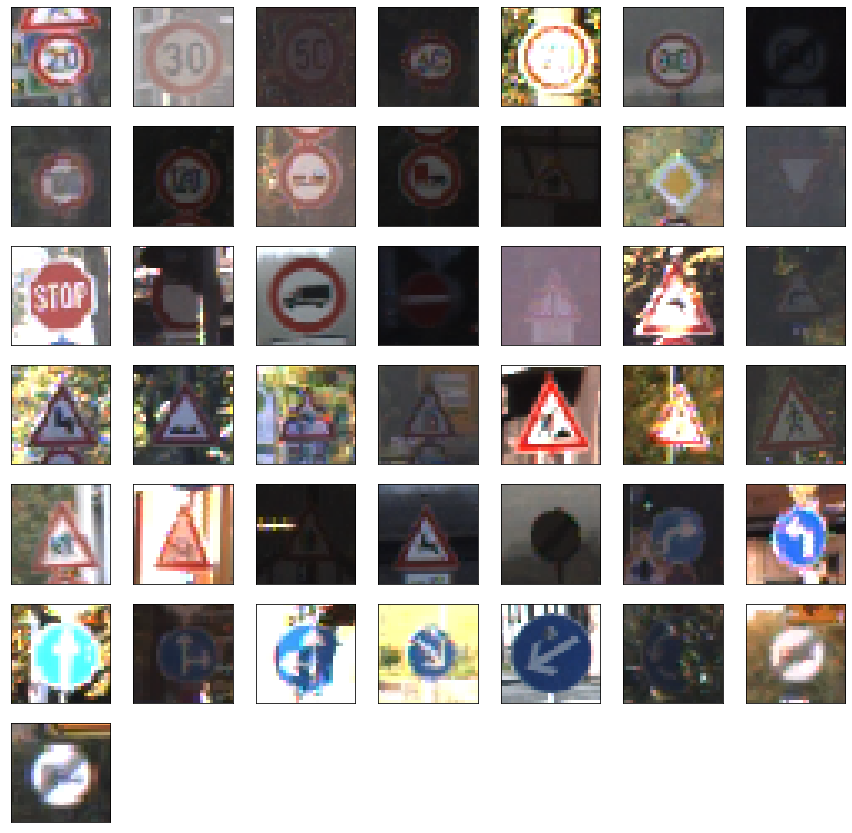

In [8]:
# visualizing all the different classes which means all traffic signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(15,15))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([]) # set labels of axis
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

## Step 3: Design, Train and Test a Model Architecture
Our model has three convolutional layers and two dense layers<br>
Next shape : (n+2p-f+1)/s + 1 where n is size of image, p is padding, f is filter size and s is stride

In [9]:
# Sequential groups a linear stack of layers into a tf.keras.Model 
model = Sequential() 

# First Convolutional Layer
# We are convolving our model with 3x3 kernel which will result 32 filters(depth will be 32). 
# Later we will apply relu activation function, which is y = max(0,x) and 
# max pooling which takes 4 pixel(because our pool size is 2x2 means 4 pixel) and result the biggest one
# Finally we use droput which helps prevent overfitting
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
# We are again convolving again our model with 3x3 kernel which will result 64 filters(depth will be 64). 
# Later we will apply relu activation function, and max pooling. 
# Finally we use droput
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
# We are again convolving again our model with 3x3 kernel which will result 64 filters(depth will be 64). 
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [10]:
# Flattening the layer to connect dense layer
# First fully connected layer has 64 neuron, and output layer has 43(NUM_CATEGORIES) neurons
# With softmax we will get a probability which is between 0 and 1 and the most one will be our result 
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [11]:
# Compiling-Configuring the model to train the model
# We have 43 classes to predict. So we are using categorical_crossentropy which is used for multi-class classification
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
# metrics = "accuracy" -> Calculates how often predictions equal labels.

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
x_train.shape

(31367, 30, 30, 3)

In [12]:
## Fitting the model - training process
# Epoch : number of passes of the entire training dataset
# Batch size : number of training examples utilized in one iteration. For example if you have x (1000) training data and batch 
# size is y (10), model will take x/y (1000/10) example for one iteration

EPOCHS = 30
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_test, y_test), 
                    epochs=EPOCHS, 
                    batch_size=64
                   )

Epoch 1/30
491/491 [==============================] - 24s 47ms/step - loss: 5.0325 - accuracy: 0.0902 - val_loss: 1.8219 - val_accuracy: 0.4575
Epoch 2/30
491/491 [==============================] - 21s 42ms/step - loss: 1.5766 - accuracy: 0.5120 - val_loss: 0.6483 - val_accuracy: 0.8052
Epoch 3/30
491/491 [==============================] - 22s 45ms/step - loss: 0.6901 - accuracy: 0.7841 - val_loss: 0.3450 - val_accuracy: 0.9083
Epoch 4/30
491/491 [==============================] - 21s 43ms/step - loss: 0.4218 - accuracy: 0.8713 - val_loss: 0.1792 - val_accuracy: 0.9570
Epoch 5/30
491/491 [==============================] - 22s 44ms/step - loss: 0.2997 - accuracy: 0.9087 - val_loss: 0.1359 - val_accuracy: 0.9663
Epoch 6/30
491/491 [==============================] - 21s 43ms/step - loss: 0.2587 - accuracy: 0.9222 - val_loss: 0.1259 - val_accuracy: 0.9668
Epoch 7/30
491/491 [==============================] - 21s 42ms/step - loss: 0.2408 - accuracy: 0.9300 - val_loss: 0.1163 - val_accuracy:

#### Plotting the Accuracy and Loss values

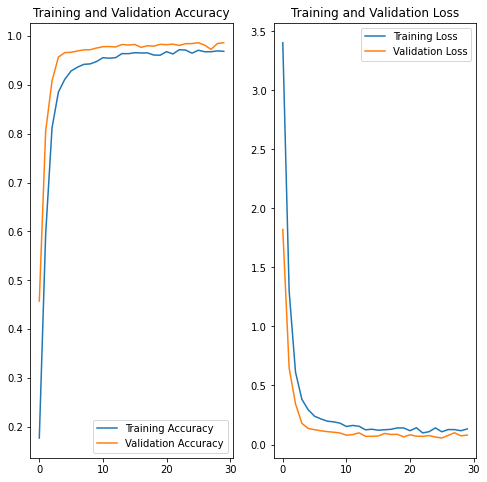

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Predictions on Test images
Our dataset contains a test.csv file, we have the details related to the image path and their respective class labels. We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data. From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 92% accuracy in this model.



In [14]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv('./Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  94.29136975455266


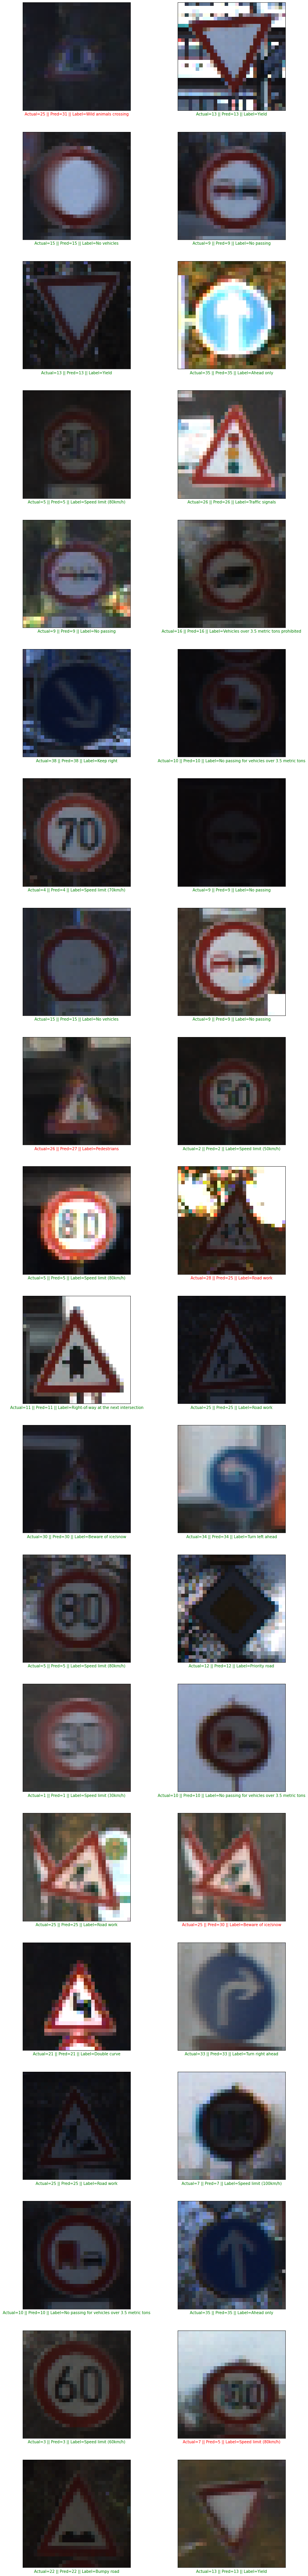

In [15]:
plt.figure(figsize = (13, 13))

start_index = 50
for i in range(40):
    plt.subplot(20, 2, i + 1)
    plt.grid(False)
    plt.xticks([]) # to not show ticks
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    label = id_to_sign_names[prediction]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={} || Label={}'.format(actual, prediction,label), color = col)
    plt.imshow(X_test[start_index + i])
    plt.subplots_adjust(bottom=3,top = 10)

plt.show()

In the end, we are going to save the model that we have trained using the Keras model.save() function.

In [16]:
model.save("Traffic_Sign_Classifier.h5")